<a href="https://colab.research.google.com/github/Shallom12/myproject/blob/main/10_04_(colab)_IMDB_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0(IMDB_Movie_Review_Sentiment_Analysis)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10-04 IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)
---

감성 분류를 연습하기 위해 자주 사용하는 영어 데이터로 영화 사이트 IMDB의 리뷰 데이터가 있습니다. 이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터입니다. 스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개하였으며, 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50대 비율로 분할하여 88.89%의 정확도를 얻었다고 소개하고 있습니다.

논문 링크 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있습니다. 해당 데이터를 학습하여 감성 분류를 수행하는 모델을 만들어보겠습니다.

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 IDMB 리뷰 감성 분류하기 튜토리얼입니다.  

링크 : https://wikidocs.net/24586  

이 자료는 2021년 10월 13일에 마지막으로 테스트되었습니다.

---
## 1. IMDB 리뷰 데이터에 대한 이해
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

케라스 데이터셋으로부터 imdb.data_load()를 통해 영화 리뷰 데이터를 로드합니다. IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공합니다. 로이터 뉴스 데이터에서 사용했던 test_split과 같은 데이터의 비율을 조절하는 인자는 imdb.load_data에서는 지원하지 않습니다.

imdb.data_load()의 인자로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지를 의미합니다. 예를 들어서 10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉, 단어 집합의 크기는 10,000이 됩니다. 지금은 별도로 제한하지 않겠습니다. 훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력합니다.

In [ ]:
(X_train_loaded, y_train_loaded), (X_test_loaded, y_test_loaded) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train_loaded)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test_loaded)))
num_classes = len(set(y_train_loaded))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


훈련용 리뷰는 25,000개, 테스트용 리뷰는 25,000개, 카테고리는 2개입니다. 훈련 데이터가 어떻게 구성되어있는지를 확인하기 위해 첫번째 훈련용 리뷰와 레이블을 출력합니다.

In [ ]:
print('첫번째 훈련용 리뷰 :',X_train_loaded[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train_loaded[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있습니다. 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태입니다. IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했습니다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높습니다. 위에서 단어 집합의 크기를 제한하지 않았기 때문에 22,665와 같은 큰 숫자도 보입니다.

첫번째 훈련용 리뷰의 레이블에 해당하는 y_train[0]의 값은 1입니다. 이 문제의 경우 감성 정보로서 0 또는 1의 값을 가지는데 긍정은 1의 값을 가집니다. 25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

In [ ]:
len_result = [len(s) for s in X_train_loaded]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


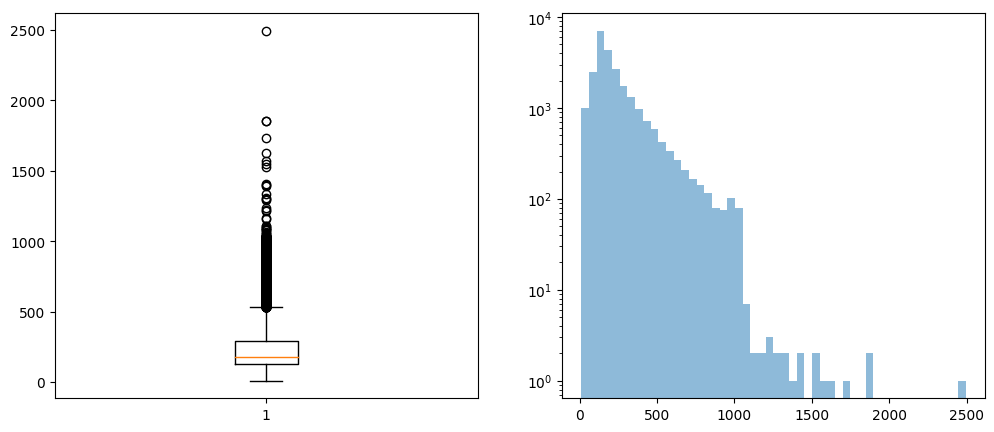

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50, alpha=0.5)
plt.yscale('log')
plt.show()

대체적으로 1,000이하의 길이를 가지며, 특히 100~500길이를 가진 데이터가 많은 것을 확인할 수 있습니다. 반면, 가장 긴 길이를 가진 데이터는 길이가 2,000이 넘는 것도 확인할 수 있습니다. 레이블의 분포를 확인해보겠습니다.

In [ ]:
unique_elements, counts_elements = np.unique(y_train_loaded, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 12,500개로 균등한 분포를 가지고 있습니다. X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠습니다. imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있습니다. 주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수입니다. 이것은 IMDB 리뷰 데이터셋에서 정한 규칙입니다.

In [ ]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

index_to_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있습니다. IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있습니다. 그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어입니다.

In [ ]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [ ]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 3938번째로 높은 단어는 suited입니다.

첫번째 훈련용 리뷰의 X_train[0]의 각 단어가 정수로 바뀌기 전에 어떤 단어들이었는지 확인해보겠습니다.

In [ ]:
index_to_word[1] # 0~3까지 비워서 채워놓음

KeyError: 1

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token
print(' '.join([index_to_word[index] for index in X_train_loaded[0]]))

In [ ]:
# index_to_word

---
## 2. GRU로 IMDB 리뷰 감성 분류하기
---
단어 집합의 크기를 10,000으로 제한하고, 리뷰 최대 길이는 500으로 제한하여 패딩을 진행합니다.

In [ ]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
vocab_size = 10000   # 10000 개 단어로 한정하여 데이터 load
(X_train_loaded, y_train_loaded), (X_test_loaded, y_test_loaded) = imdb.load_data(num_words = vocab_size)

In [ ]:
X_train_loaded, y_train_loaded

In [ ]:
## 문장의 크기(단어수 제한)을 500으로 지정 -> 이외 단어는 OOV (unk)
max_len = 500
X_train = pad_sequences(X_train_loaded, maxlen=max_len)
X_test = pad_sequences(X_test_loaded, maxlen=max_len)
X_train.shape, X_test.shape

In [ ]:
# X_train[0]

하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128입니다. 모델은 다 대 일 구조의 GRU를 사용합니다. 해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델입니다. 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용합니다. 하이퍼파라미터인 배치 크기는 64이며, 15 에포크를 수행합니다.

EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다. validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인합니다. 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용됩니다.

In [ ]:
embedding_dim = 100  # 임베딩 벡터의 크기 (차원)
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # vocab_size=10000
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc = ModelCheckpoint('GRU_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
%%time
# 노트북 : 313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 380ms/step - acc: 0.9762 - loss: 0.0713 - val_acc: 0.8712 - val_loss: 0.3364
# Epoch 11: early stopping
# CPU times: total: 20min 21s
# Wall time: 23min 4s
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train_loaded, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

저자의 경우, 조기 종료 조건에 따라서 에포크 9에서 조기 종료되었습니다. 훈련이 다 되었다면 테스트 데이터에 대해서 정확도를 평가할 차례입니다. 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드합니다.

In [ ]:
loaded_model = load_model('GRU_model.keras')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test_loaded)[1]))

테스트 데이터에 대해서 정확도 88.93%를 얻습니다. 임의의 문장에 대해서 리뷰의 긍, 부정을 예측하고자 합니다. 이를 위해서는 모델에 넣기 전에 임의의 문장에 대해서 전처리를 해주어야 합니다. sentiment_predict은 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수입니다.

In [ ]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

  # 정수 인코딩
  encoded = []
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len) # 패딩
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

IMDB 사이트에 접속해서 영화 블랙팬서의 1점 리뷰를 가져왔습니다. 부정으로 예측하는지 테스트해보겠습니다.

In [ ]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

IMDB 사이트에 접속해서 영화 어벤져스의 10점 리뷰를 가져왔습니다. 긍정으로 예측하는지 테스트해보겠습니다.

In [ ]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

마지막 편집일시 : 2022년 11월 14일 3:08 오후

In [ ]:
((model.predict(X_test[:20]) > 0.5) * 1).flatten() == y_test_loaded[:20]

In [ ]:
X_test_loaded[2]

In [ ]:
y_test_loaded[2]

In [ ]:
' '.join([index_to_word[idx] for idx in X_test_loaded[2]])

In [ ]:
model.predict(X_test[2:3])